In [125]:
import numpy as np
import random

energy_to_points = np.array([2,3,4,6,9,12])
energy = np.array([1,2,3,4,5,6])

energy_to_points_namor = np.array([2,3,4,6,9,12,11,5])
energy_namor = np.array([1,2,3,4,5,6,4,3])

energy_to_points_infinaut = np.array([2,3,4,6,9,12,20])
energy_infinaut = np.array([1,2,3,4,5,6,6])

def get_expected_points(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
    print(i)
    points += run_sim(1, deck.copy(), np.zeros(len(deck)))
  return points / sim_count

def get_expected_points_namor(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
#     print(i)
    points += run_sim_namor(1, deck.copy(), np.zeros(len(deck)), 0)
  return points / sim_count

def get_expected_points_infinaut(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
    print(i)
    points += run_sim_infinaut(1, deck.copy(), np.zeros(len(deck)))
  return points / sim_count

def get_expected_points_chavez(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
#     print(i)
    points += run_sim_chavez(1, deck.copy(), np.zeros(len(deck)))
  return points / sim_count

def pick_a_card(deck, hand):
  picked_card_idx = random.choices([i for i in range(len(deck))], weights=deck)[0]
  deck[picked_card_idx] -= 1
  hand[picked_card_idx] += 1


def run_sim(round_num, deck, hand):
  points_list = [0]

  if round_num == 7:
    return 0

  if round_num == 1:
    for _ in range(4):
      pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)

  curr_choice = np.zeros(len(hand))
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points) + run_sim(round_num + 1, deck.copy(), hand_copy))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy) <= round_num:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

def run_sim_namor(round_num, deck, hand, num_cards_played):
  points_list = [0]

  if round_num == 7 or (num_cards_played == 8 and deck[-1] == 0 and hand[-1] == 0):
    return 0

  if round_num == 1:
    for _ in range(4):
      pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)

  curr_choice = np.zeros(len(hand))
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points_namor) + run_sim_namor(round_num + 1, deck.copy(), hand_copy, num_cards_played + sum(curr_choice[:-1])))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy_namor) <= round_num and num_cards_played + sum(curr_choice[:-2]) <= 8:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

def run_sim_infinaut(round_num, deck, hand):
  points_list = [0]

  if round_num == 7:
    return 0

  if round_num == 1:
    for _ in range(4):
      pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)
    
  if round_num == 5:
    return run_sim_infinaut(round_num+1, deck, hand)

  curr_choice = np.zeros(len(hand))
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points_infinaut) + run_sim_infinaut(round_num + 1, deck.copy(), hand_copy))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy_infinaut) <= round_num:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

def run_sim_chavez(round_num, deck, hand):
  points_list = [0]

  if round_num == 6:
    return 9

  if round_num == 1:
    for _ in range(4):
      pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)

  curr_choice = np.zeros(len(hand))
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points) + run_sim_chavez(round_num + 1, deck.copy(), hand_copy))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy) <= round_num:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

In [126]:
decks = []
for ones in range(12):
  for twos in range(12 - ones):
    for threes in range(12 - ones - twos):
      for fours in range(12 - ones - twos - threes):
          fives = 11 - ones - twos - threes - fours
#         for fives in range(12 - ones - twos - threes - fours):
#           sixes = 11 - ones - twos - threes - fours - fives
          decks.append(np.array((ones, twos, threes, fours, fives, 1)))

In [129]:
len(decks)

1365

In [ ]:
points_avg = {}
points_max = 0
for i in range(len(decks)):
    print("epoch: " + str(i+1) + "/" + str(len(decks)))
    points = get_expected_points_chavez(np.array(decks[i]), 3000)
    points_avg[tuple(decks[i])] = points
#     print(str(list(decks[i])) + ": " + str(points))
    if points >= points_max - 0.5:
        print(str(list(decks[i])) + ": " + str(points))
        if points > points_max:
            points_max = points

In [132]:
decks_list = []
points = []

for i in points_avg:
    decks_list.append(i)
    points.append(points_avg[i])

In [133]:
points_sorted = [points[i] for i in np.argsort(points)[::-1]]
decks_sorted = [decks_list[i] for i in np.argsort(points)[::-1]]

In [ ]:
points_sorted

In [ ]:
decks_sorted

In [ ]:
get_expected_points_infinaut(np.array((7, 2, 1, 1, 0, 0, 1)), 3000)

In [8]:
import matplotlib.pyplot as plt

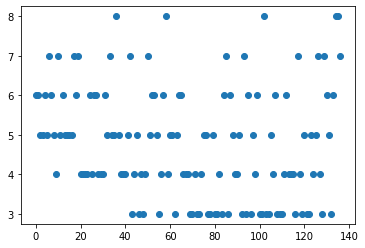

In [23]:
y = []

for i in range(len(decks_sorted)):
#     if decks_sorted[i][5] == 1 and decks_sorted[i][4] == 1 and decks_sorted[i][3] == 1  and decks_sorted[i][2] != 2:
#         y.append(decks_sorted[i][1])
    y.append(decks_sorted[i][0])

plt.scatter([i for i in range(len(y))], y)
plt.show()

In [ ]:
best_decks = [(6, 2, 1, 1, 1, 1),
 (6, 3, 0, 1, 1, 1),
 (5, 3, 1, 1, 1, 1)] # 35.34

In [ ]:
# points_avg_1 = {}
# points_avg_2 = {}
# points_avg_3 = {}

In [69]:
def get_expected_points_1(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
    print(i)
    points += run_sim_1(1, deck.copy(), np.zeros(6))
  return points / sim_count

def get_expected_points_2(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
    print(i)
    points += run_sim_2(1, deck.copy(), np.zeros(6))
  return points / sim_count

def get_expected_points_3(deck, sim_count=100):
  points = 0
  for i in range(sim_count):
    print(i)
    points += run_sim_3(1, deck.copy(), np.zeros(6))
  return points / sim_count

def run_sim_1(round_num, deck, hand):
  points_list = [0]

  if round_num == 7:
    return 0

  if round_num == 1:
    if deck[0] > 0:
        deck[0] -= 1
        hand[0] += 1
        for _ in range(3):
          pick_a_card(deck, hand)
    else:
        for _ in range(4):
          pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)

  curr_choice = np.zeros(6)
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points) + run_sim(round_num + 1, deck.copy(), hand_copy))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy) <= round_num:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

def run_sim_2(round_num, deck, hand):
  points_list = [0]

  if round_num == 7:
    return 0

  if round_num == 1:
    for _ in range(4):
      pick_a_card(deck, hand)
  elif round_num == 2:
    if deck[1] > 0:
        deck[1] -= 1
        hand[1] += 1
    else:
        pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)

  curr_choice = np.zeros(6)
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points) + run_sim(round_num + 1, deck.copy(), hand_copy))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy) <= round_num:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

def run_sim_3(round_num, deck, hand):
  points_list = [0]

  if round_num == 7:
    return 0

  if round_num == 1:
    if deck[0] > 0:
        deck[0] -= 1
        hand[0] += 1
        for _ in range(3):
          pick_a_card(deck, hand)
    else:
        for _ in range(4):
          pick_a_card(deck, hand)
  elif round_num == 2:
    if deck[1] > 0:
        deck[1] -= 1
        hand[1] += 1
    else:
        pick_a_card(deck, hand)
  elif sum(hand) < 7:
    pick_a_card(deck, hand)

  curr_choice = np.zeros(6)
  while True:
    hand_copy = hand - curr_choice
    points_list.append(sum(curr_choice*energy_to_points) + run_sim(round_num + 1, deck.copy(), hand_copy))

    while True:
      i = 0
      while i < len(hand):
        if curr_choice[i] < hand[i]:
          curr_choice[i] += 1
          break
        else:
          curr_choice[i] = 0
          i += 1
      
      if sum(curr_choice*energy) <= round_num:
        break
    
    if sum(curr_choice) == 0:
      break
  
  return max(points_list)

In [ ]:
# count = 0
# for ones in range(0, 13):
#   for twos in range(0, 13 - ones):
#     for threes in range(0, 13 - ones - twos):
#       for fours in range(0, 13 - ones - twos - threes):
#         for fives in range(0, 13 - ones - twos - threes - fours):
#           sixes = 12 - ones - twos - threes - fours - fives
#           print(count)
#           count += 1
#           deck = (ones, twos, threes, fours, fives, sixes)
#           points_avg_1[deck] = get_expected_points_1(np.array(deck))
#           points_avg_2[deck] = get_expected_points_2(np.array(deck))
#           points_avg_3[deck] = get_expected_points_3(np.array(deck))

In [71]:
decks = []
points = []

for i in points_avg:
    decks.append(i)
    points.append(points_avg_3[i])
    
points_sorted = [points[i] for i in np.argsort(points)[::-1]]
decks_sorted = [decks[i] for i in np.argsort(points)[::-1]]

In [ ]:
points_sorted

In [ ]:
decks_sorted

In [ ]:
get_expected_points_3(np.array((4, 3, 2, 1, 1, 1)), 1000)

In [ ]:
import numpy as np
import random

game_env = Game(Player(), Player())

class Game:
    def __init__(self, player1, player2):
        self.players = [player1, player2]
        random.shuffle(self.players)
        
        self.board = (([], [], []),
                      ([], [], []))
        
        self.energy_to_points = np.array([2,3,4,6,9,12])
        
    def play():
        for round_num in range(1, 7):
            curr_board = self.board.copy()
            for player_num in self.players:
                player = self.players[player_num]
                player.pick_cards(round_num)
                moves = player.choose_cards(curr_board)
                
                energy_left = round_num
                for move in moves:
                    position, energy = move
                    if curr_board[player_num][position] == 4:
                        print("played in a position that's full!")
                        return not player_num
                    if energy_left < energy:
                        print("played card that uses more energy that you have available!")
                        return not player_num
                    self.board[player_num][position].append(self.energy_to_points[energy-1])
                    energy_left - energy
            self.board = curr_board
        
        score = 0
        dominant_positions = 0
        for pos in range(3):
            first_score = sum(self.board[0][pos])
            second_score = sum(self.board[1][pos])
            score += first_score - second_score
            dominant_position += (first_score > second_score) - (first_score < second_score)
        
        if dominant_position >= 0:
            if score == 0:
                return -1
            return 0
        return 1